In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.special
import ghalton
import numpy as np
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')
from utils import clean

In [3]:
from utils import clean,to_radian,hann
from rotation_2d import rot_cost_func
from visualize import plot_cost_func
from cost_functions import cf_ssd
from get_data import get_data_all,get_data

In [4]:
# load data
data_dict = pickle.load(open('data_dict.p','rb'))
dict_10mm, dict_8mm, dict_6_4mm = get_data_all()
list_6_4mm, list_8mm, list_10mm = get_data()

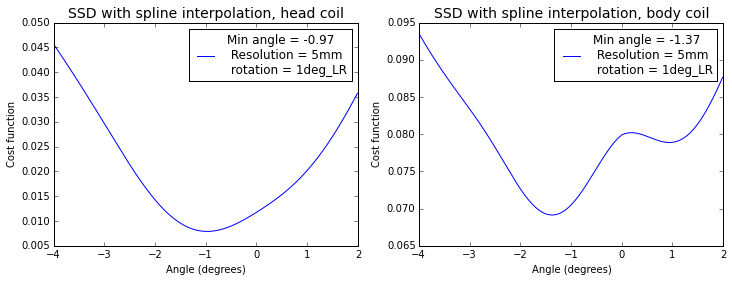

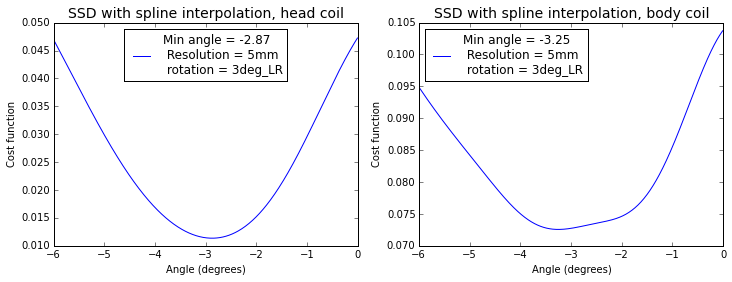

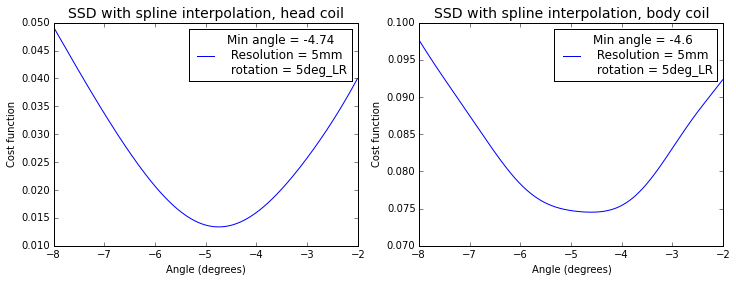

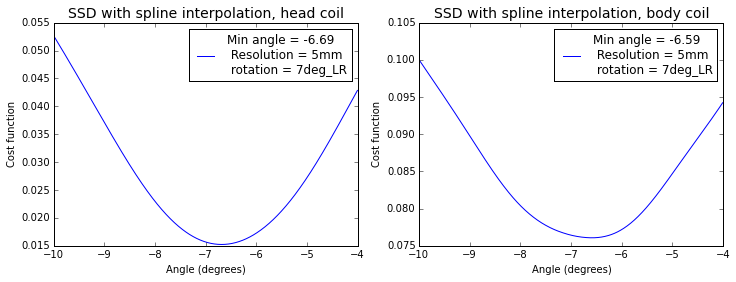

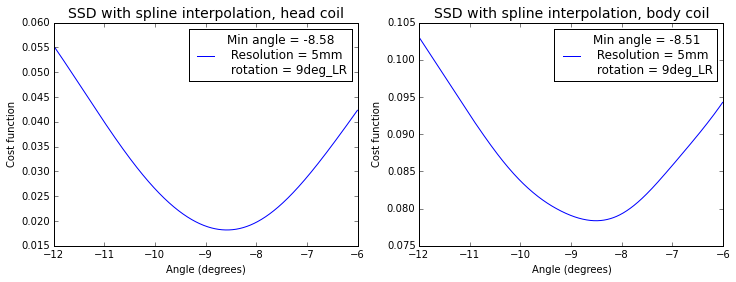

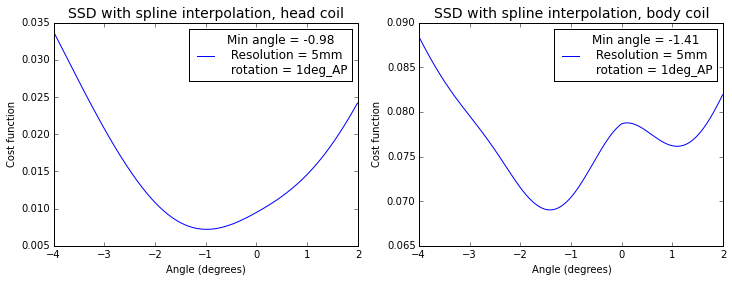

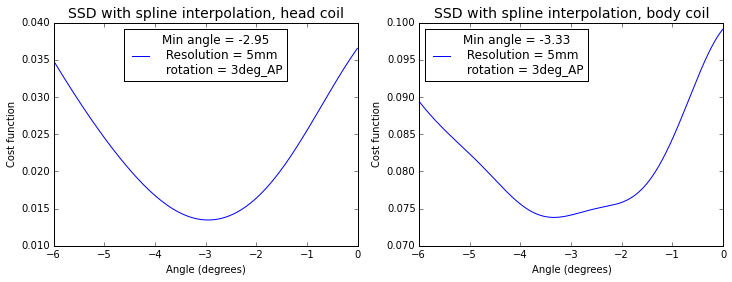

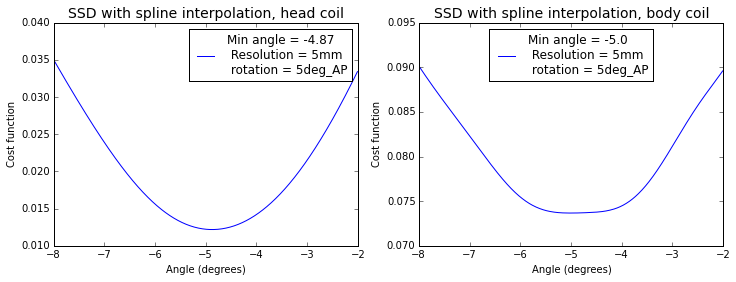

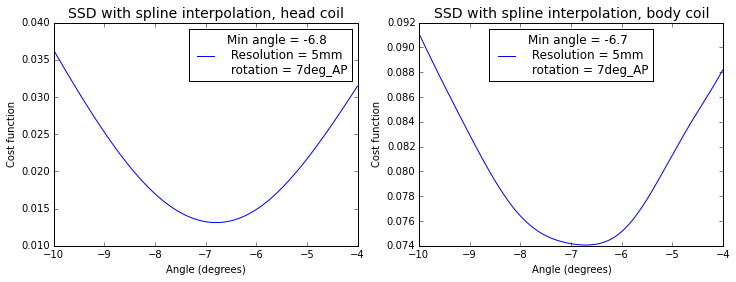

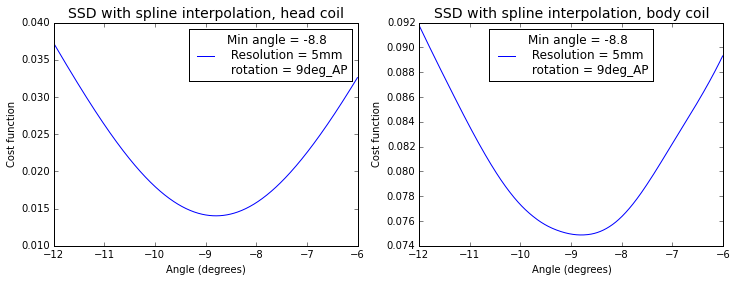

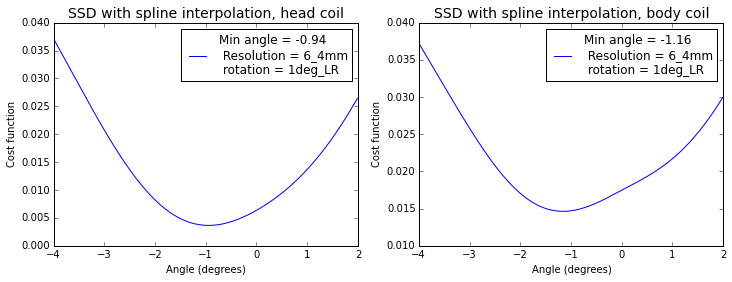

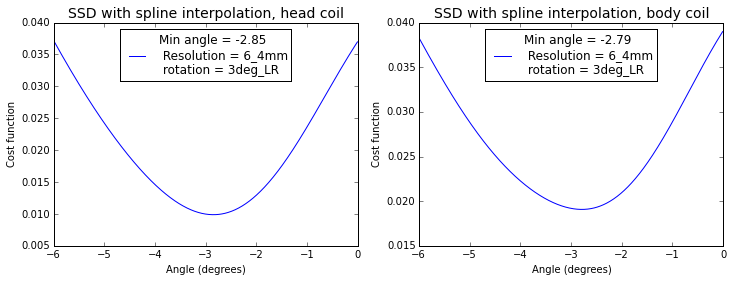

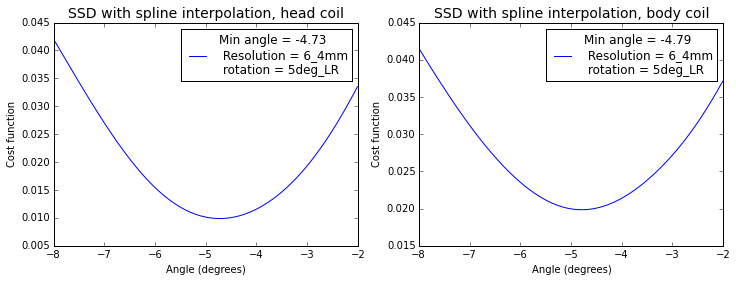

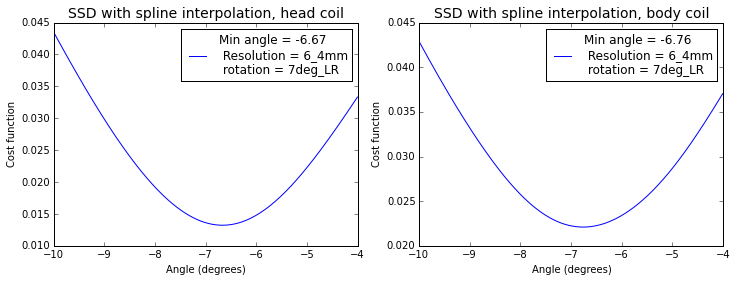

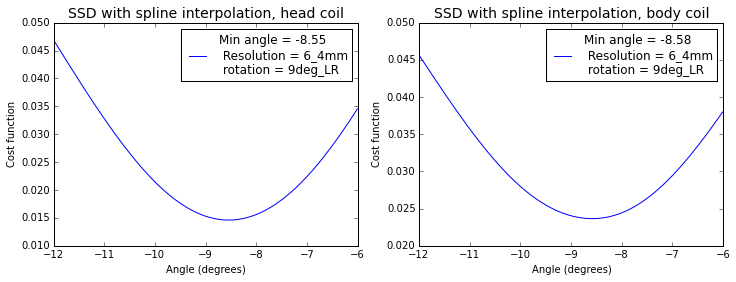

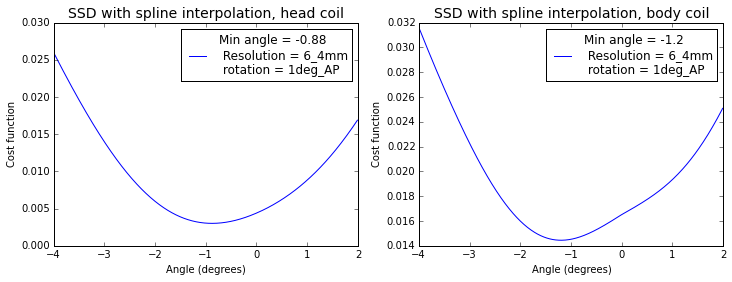

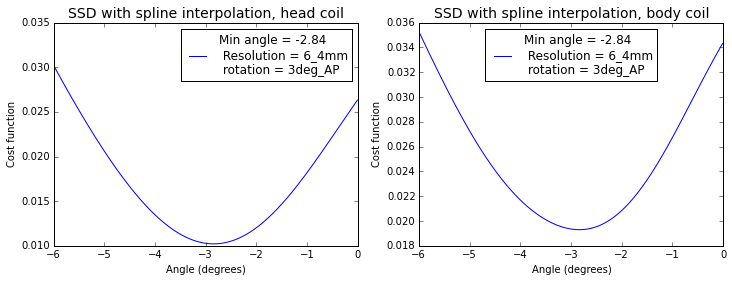

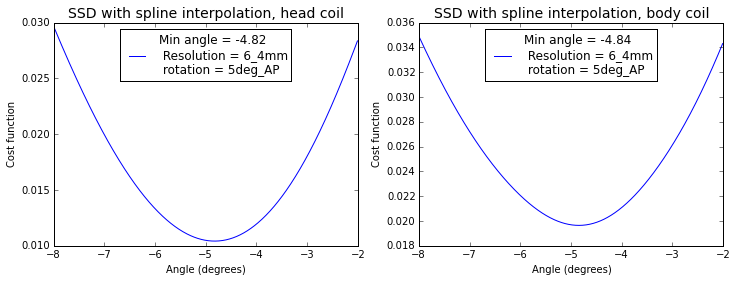

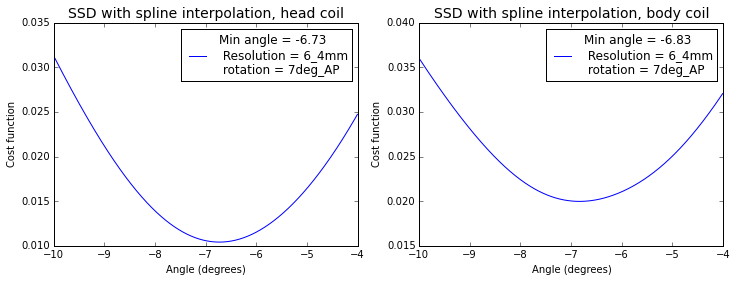

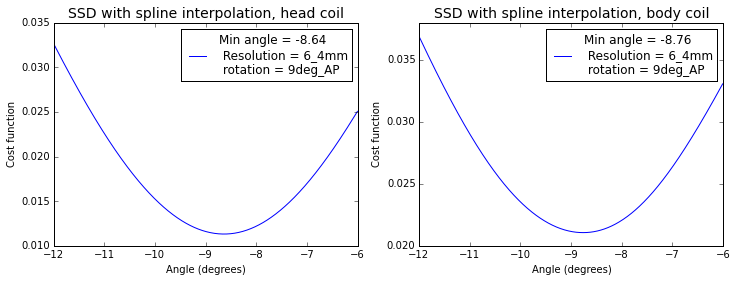

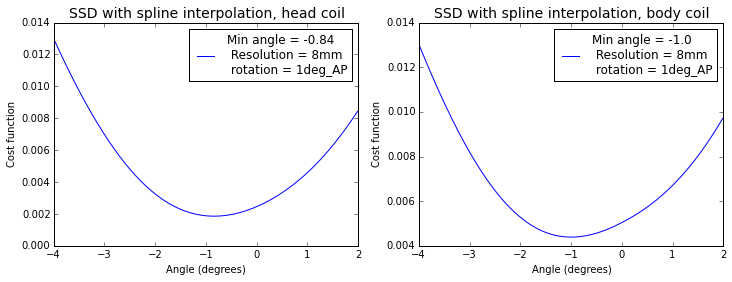

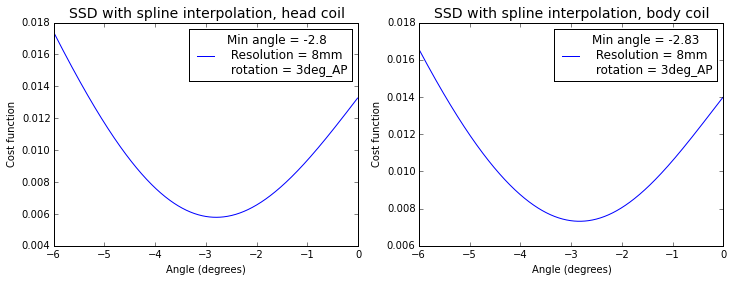

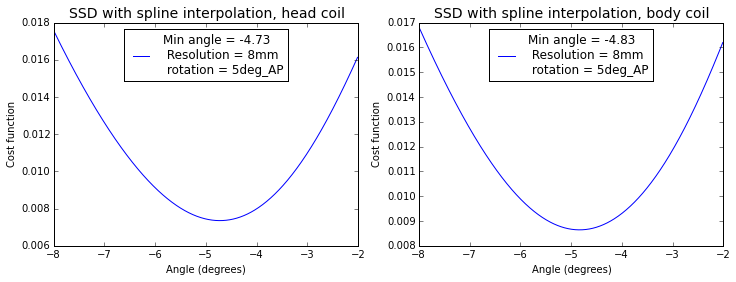

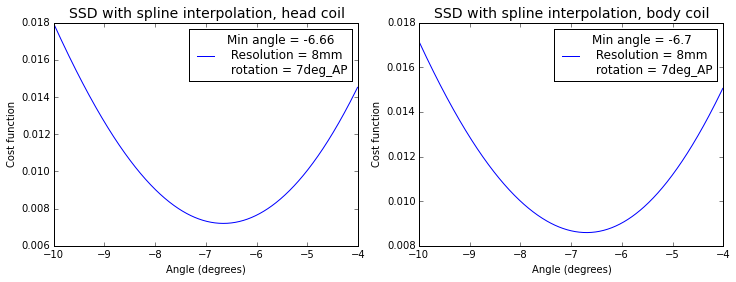

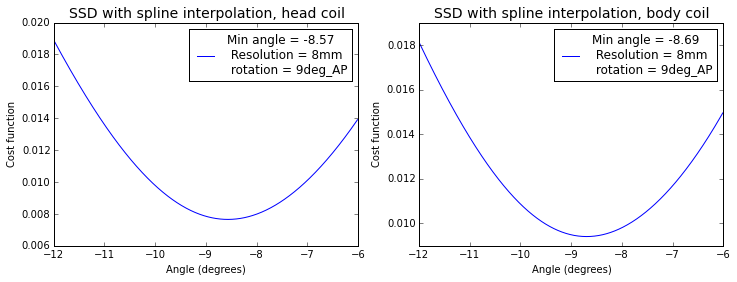

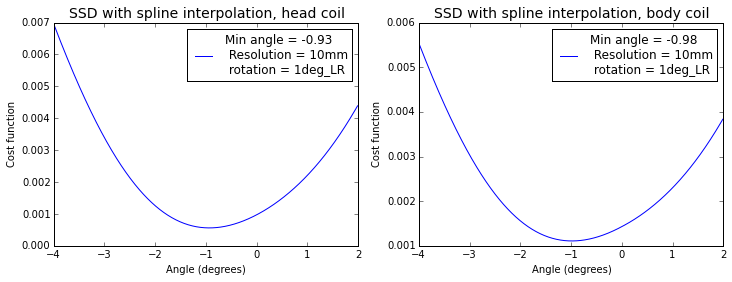

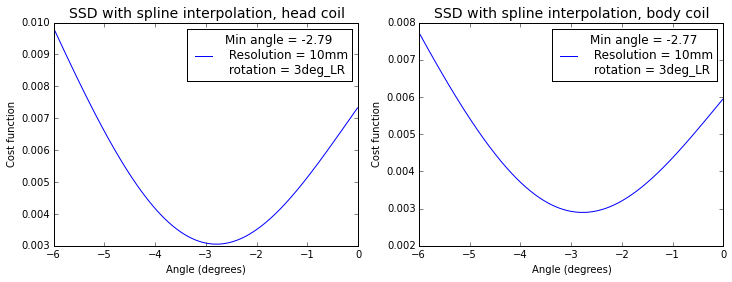

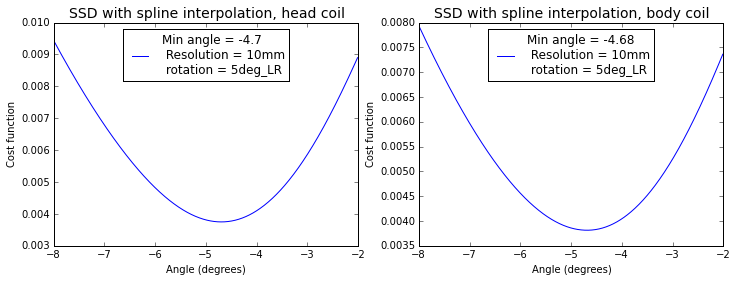

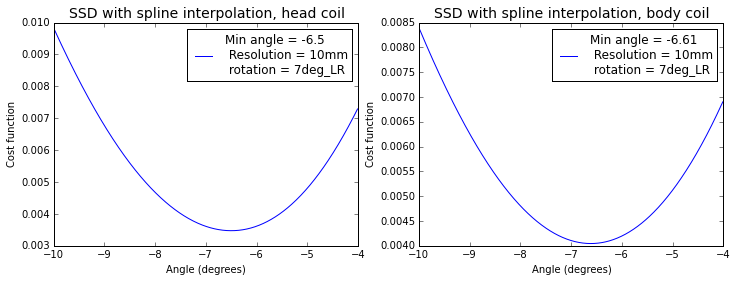

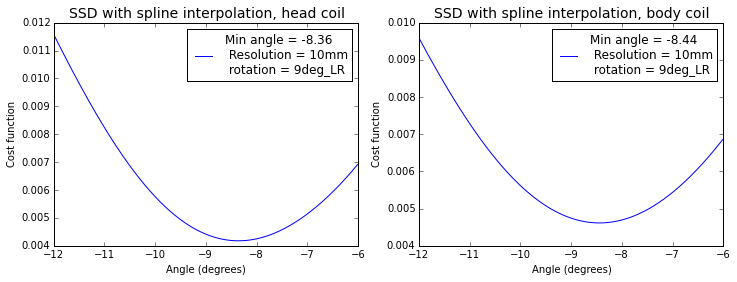

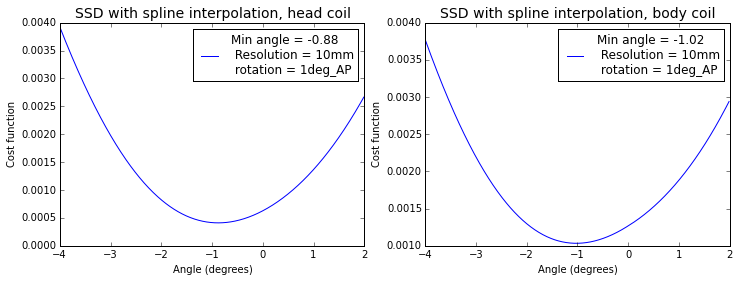

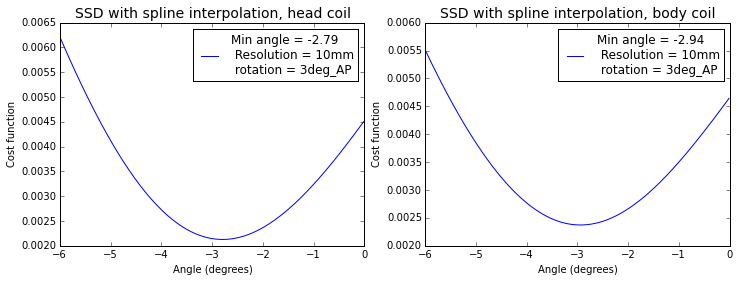

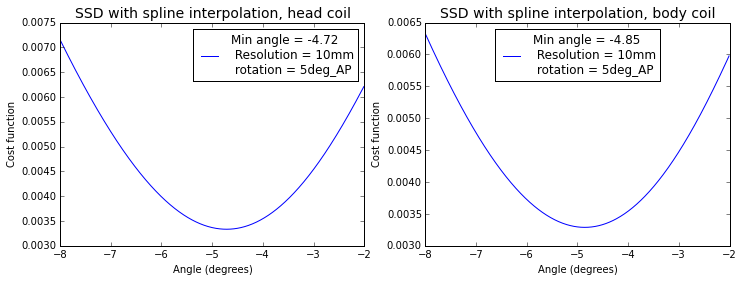

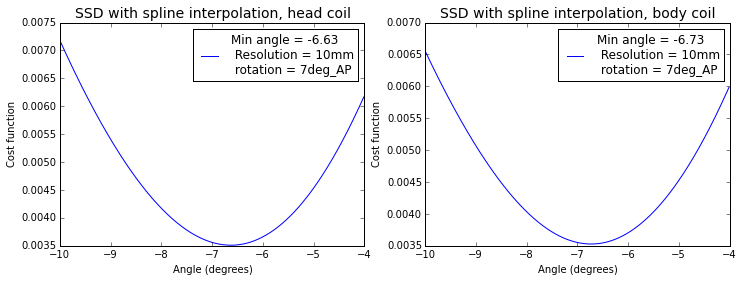

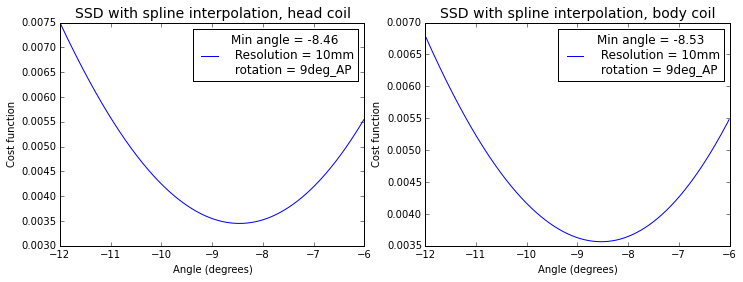

In [6]:
# repetition 0
cost_dict = {}
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    cost_dict[res] = {}
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        cost_dict[res][rot] = {}
        for deg in degrees:
            plt.figure(figsize=[12,4])
            cost_dict[res][rot][deg] = {}
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,-d+3,0.01)
                cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0],
                                     thetas,axis=ax,interpolation='spline')
                cost_dict[res][rot][deg][coil] = cost
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'spline',deg+'_'+rot, coil)
            plt.show()
pickle.dump(cost_dict,open('cost_dict_spline_nomask.p','wb'))

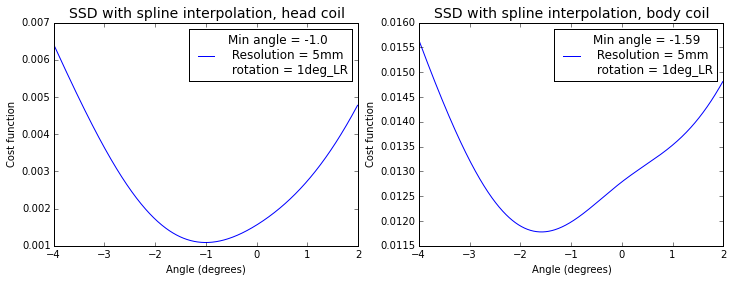

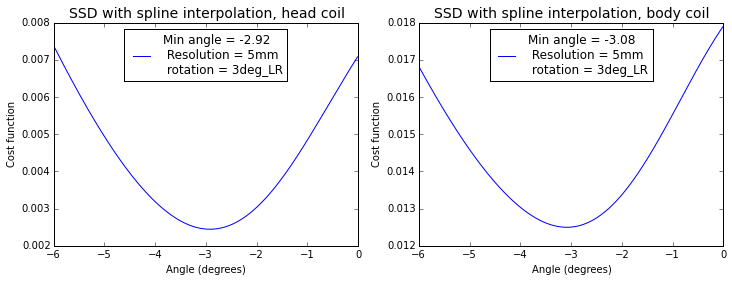

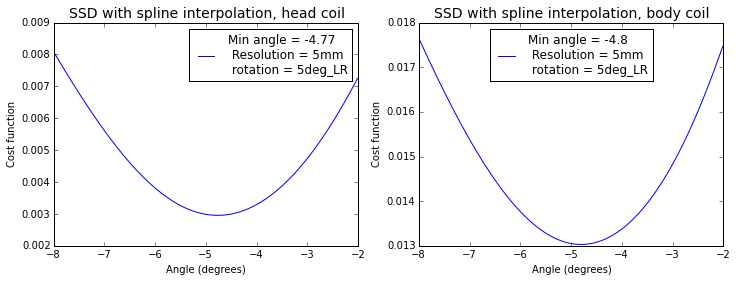

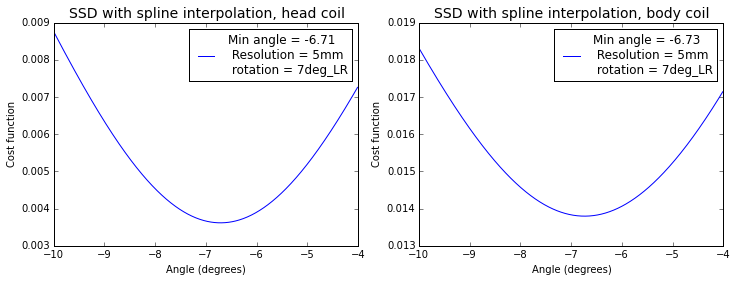

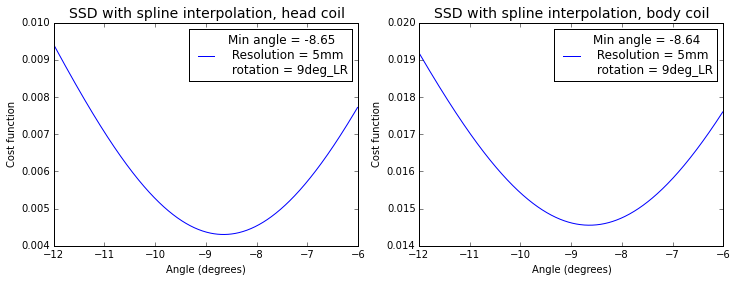

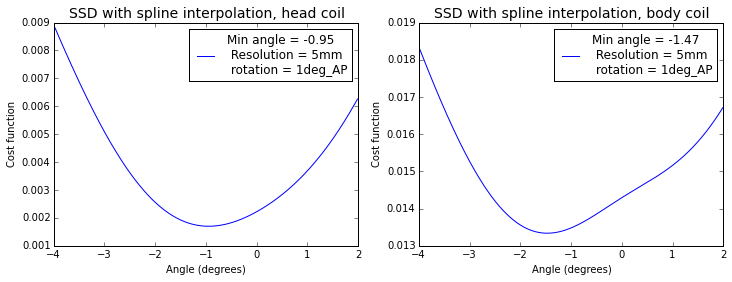

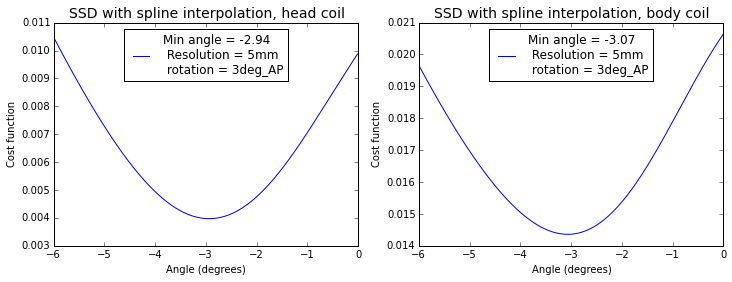

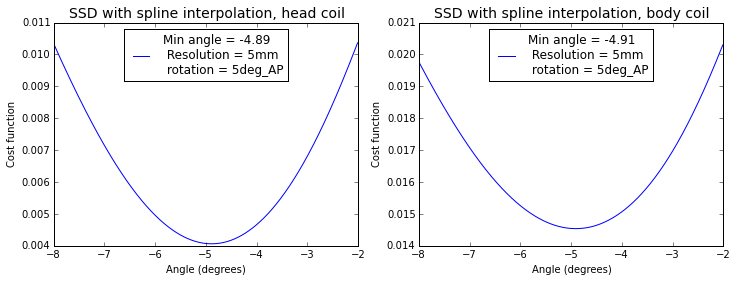

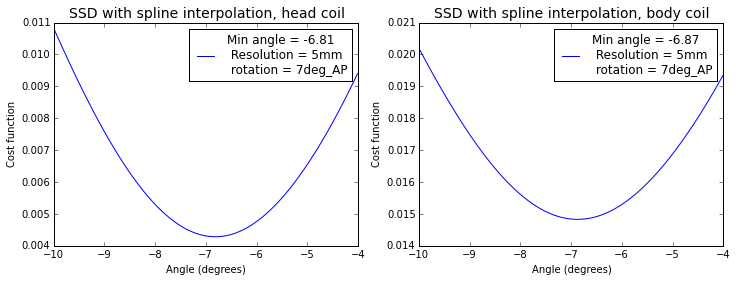

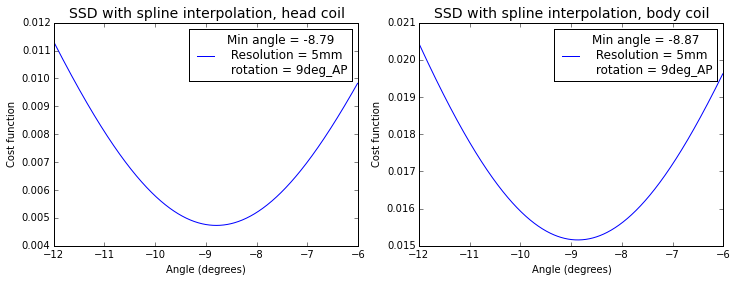

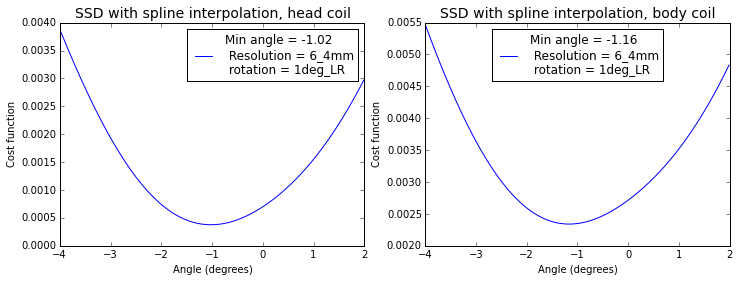

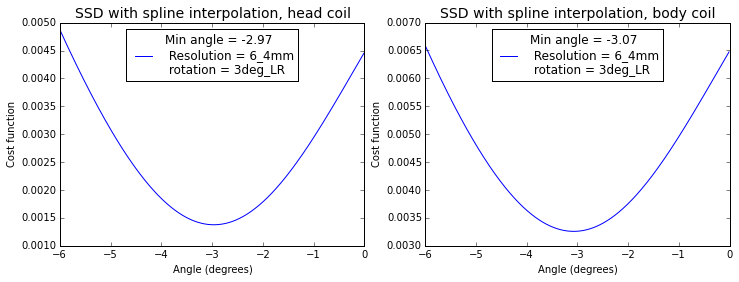

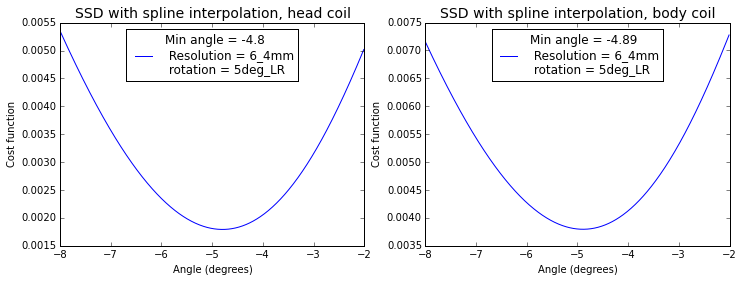

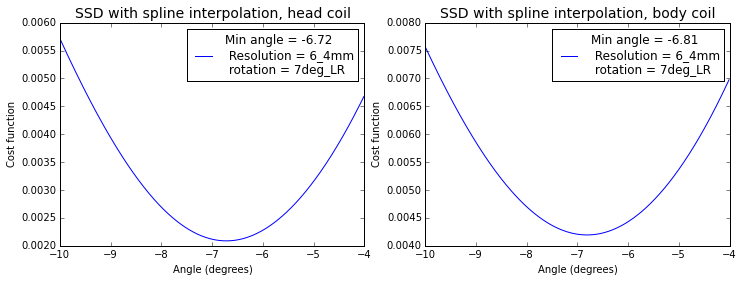

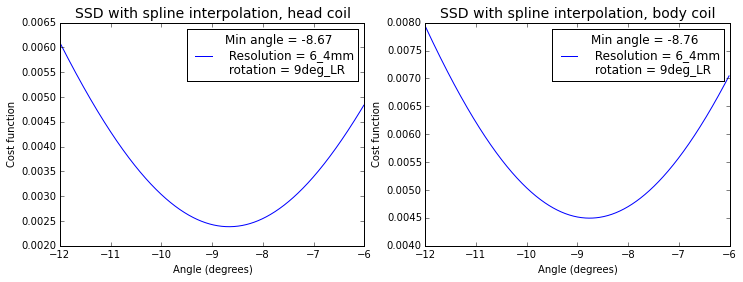

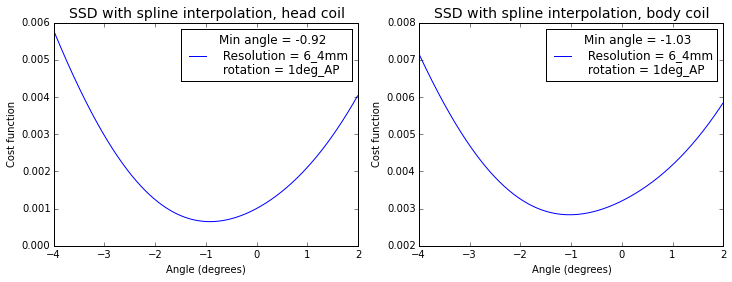

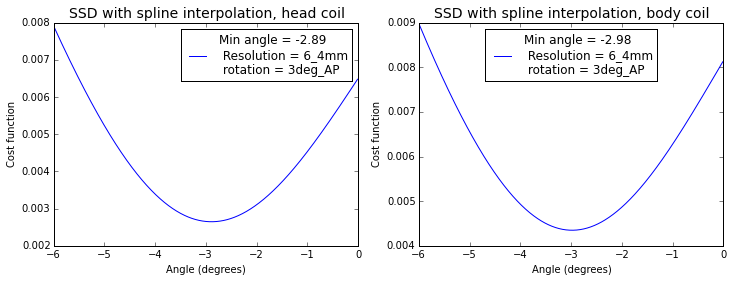

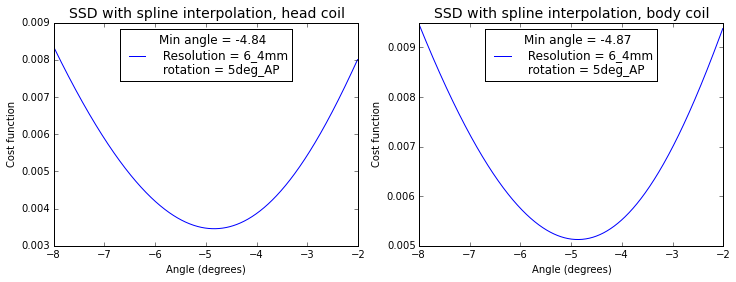

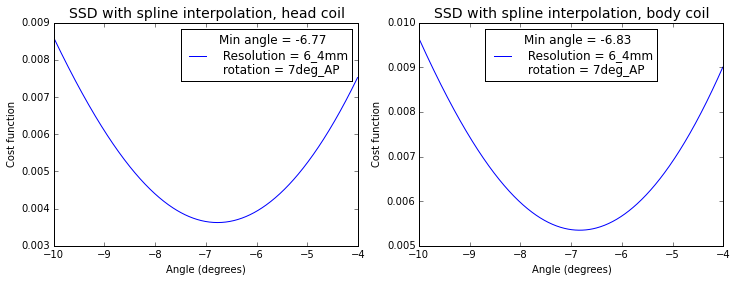

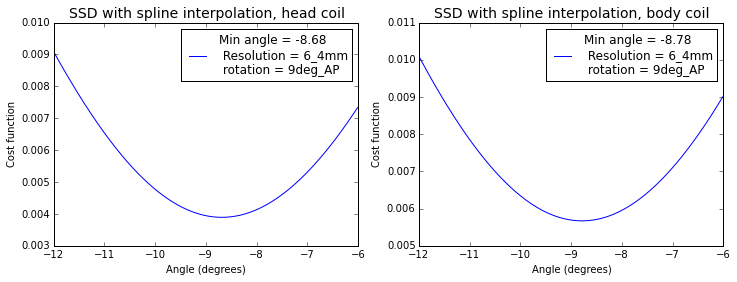

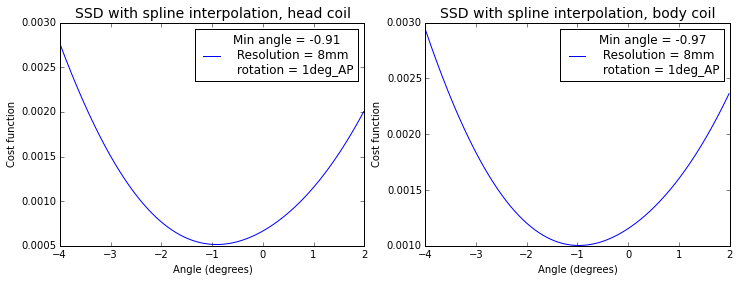

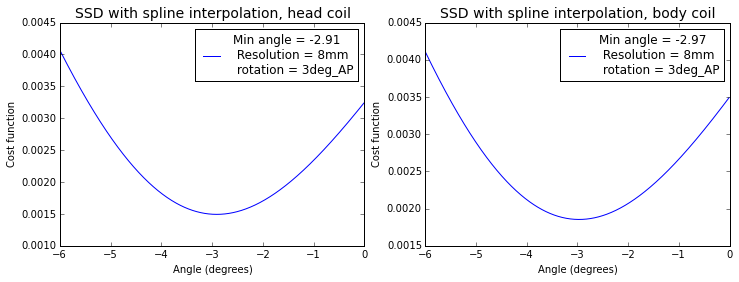

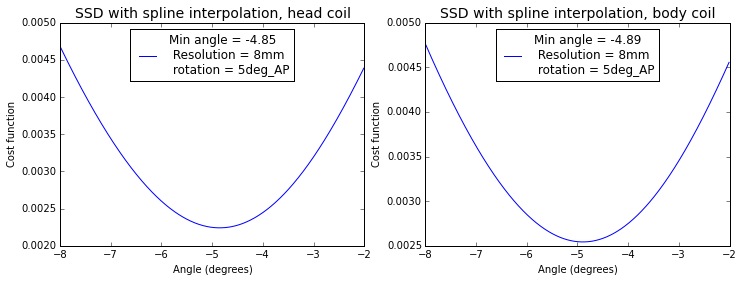

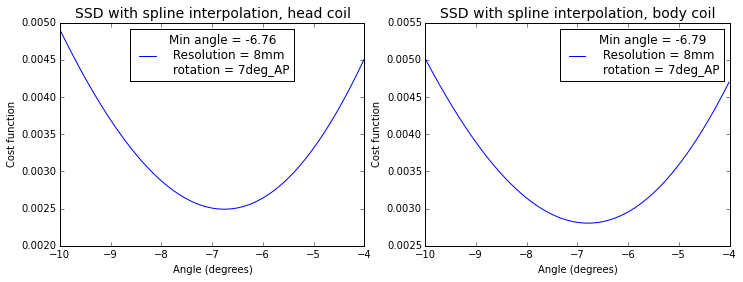

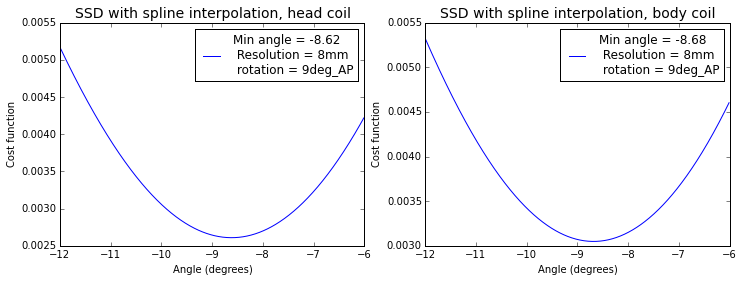

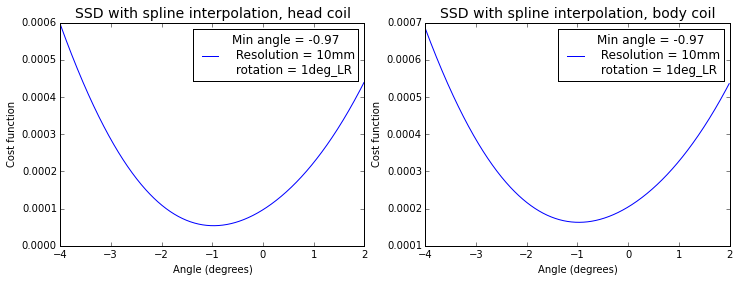

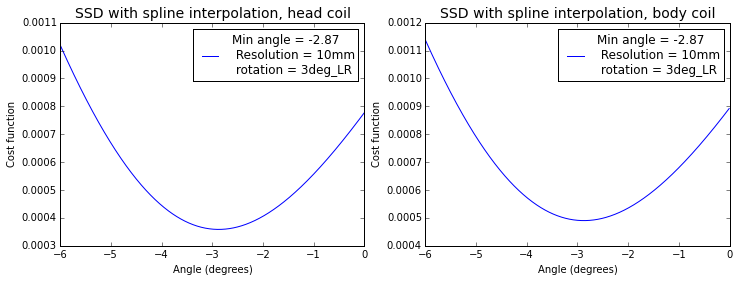

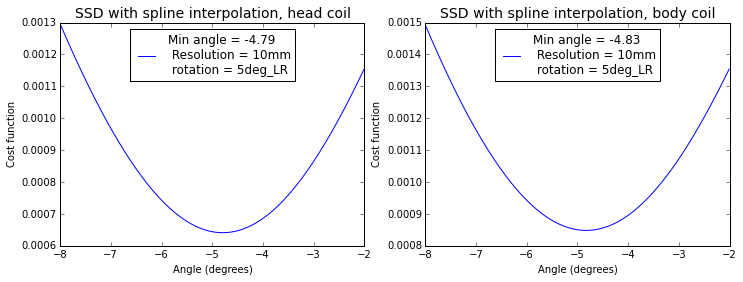

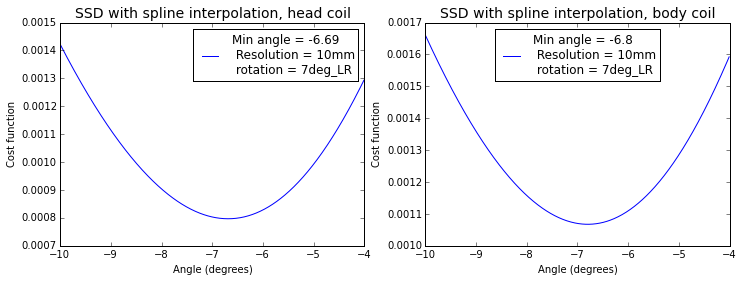

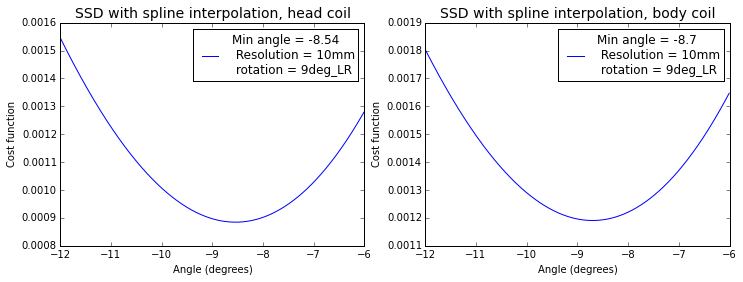

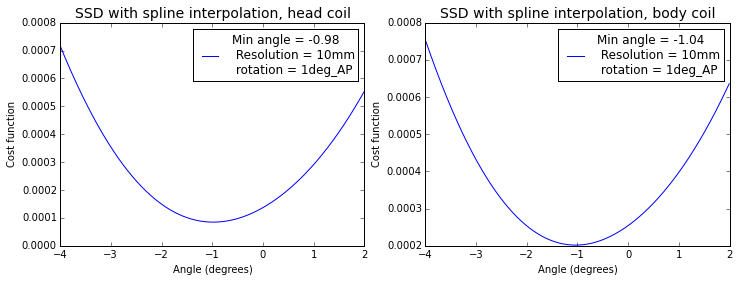

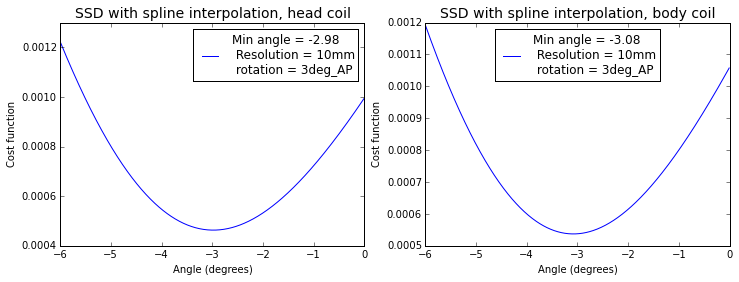

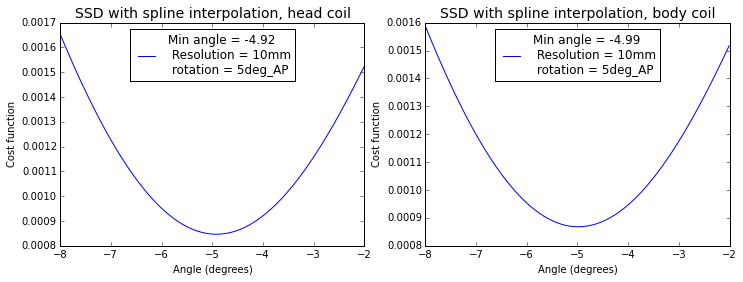

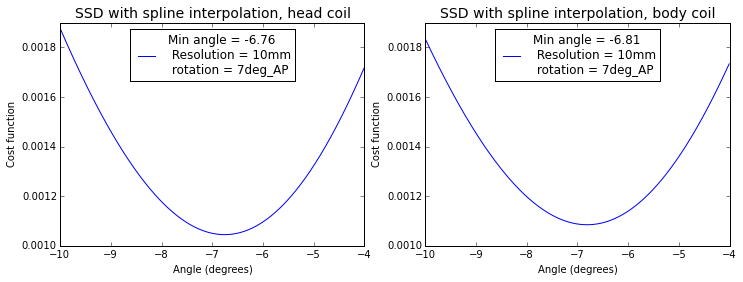

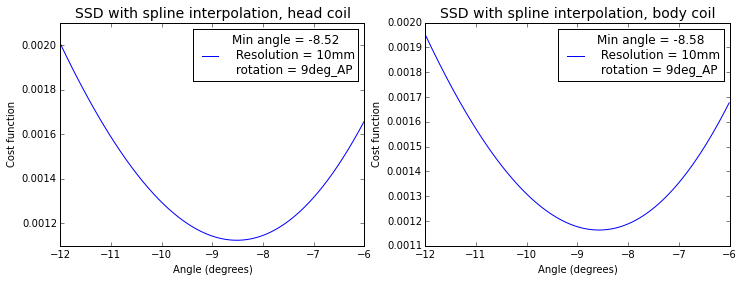

In [7]:
# repetition 0 with mask
cost_dict = {}
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    cost_dict[res] = {}
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        cost_dict[res][rot] = {}
        for deg in degrees:
            plt.figure(figsize=[12,4])
            cost_dict[res][rot][deg] = {}
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,-d+3,0.01)
                cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0],
                                     thetas,axis=ax,interpolation='spline',mask=True,smooth=True)
                cost_dict[res][rot][deg][coil] = cost
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'spline',deg+'_'+rot, coil)
            plt.show()
pickle.dump(cost_dict,open('cost_dict_spline_mask.p','wb'))